# Problem 2

In [77]:
import os
from scipy.cluster.vq import kmeans2 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import re
import pandas as pd
import math

In [78]:
file_path = '/Users/aryanbarik/Code/EE 541 Deep Learning/hw2/cluster.txt'


In [79]:
# Define a regex pattern for valid lines
pattern = "^[^#]"

# Function to check if a line is valid
def is_valid_line(line):
    return re.match(pattern, line) is not None

# Read the data from the file and filter out invalid lines
with open(file_path, 'r') as file:
    valid_lines = [line.strip() for line in file if is_valid_line(line)]
    
data = pd.DataFrame([line.split(' ') for line in valid_lines], columns=['x', 'y', 'class'])
data['x'] = pd.to_numeric(data['x'])
data['y'] = pd.to_numeric(data['y'])

df = data


### 2(a) Use K-Means clustering with 3-clusters to label each (x, y) pair as Head, Ear Right, or Ear - Left. You may use any standard NumPy or SciPy packages or experiment with your own implementation. Produce a scatter plot marking each (x, y) pair as either BLUE (class = Head), RED (class = Ear Left) or GREEN (class = Ear Right). Compare the K-means predicted labels to the true label and generate a confusion matrix showing the respective accuracies.

In [80]:
# Perform K-Means clustering with 3 clusters
num_clusters = 3
coordinates = df[['x', 'y']]
centroids, labels = kmeans2(coordinates, num_clusters)

# Map K-Means cluster labels to your classes (Head, Ear Right, Ear Left)
cluster_to_class_mapping = {
    0: 'Head',
    1: 'Ear_left',
    2: 'Ear_right'
}

num_labels = labels
print(num_labels)

# Assign predicted labels based on K-Means clustering
predicted_labels = [cluster_to_class_mapping[label] for label in labels]

print(predicted_labels)


[1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 0 2 1 1 1
 1 1 0 1 1 1 2 1 1 1 0 1 1 1 2 1 0 1 2 1 2 0 1 1 1 0 0 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 0 2 2 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 0 2 1 1 0 1
 1 1 1 1 1 2 1 1 1 1 1 1 0 1 2 2 0 1 1 1 1 2 1 2 0 1 1 0 2 1 0 2 1 0 1 1 2
 1 1 0 1 1 1 0 1 2 1 2 2 1 1 2 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 0 1 2 1 1
 1 1 1 1 1 2 2 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 2 0 2 1 2 1 1 2 1 1
 0 0 1 2 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1
 2 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 2 2 2 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
['Ear

In [81]:
print(predicted_labels)

['Ear_left', 'Ear_left', 'Head', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Head', 'Ear_left', 'Ear_left', 'Head', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_right', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Head', 'Ear_right', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Head', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_right', 'Ear_left', 'Ear_left', 'Ear_left', 'Head', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_right', 'Ear_left', 'Head', 'Ear_left', 'Ear_right', 'Ear_left', 'Ear_right', 'Head', 'Ear_left', 'Ear_left', 'Ear_left', 'Head', 'Head', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_right', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_left', 'Head', 'Ear_right', 'Ear_right', 'Head', 'Ear_left', 'Ear_left', 'Ear_left', 'Ear_l

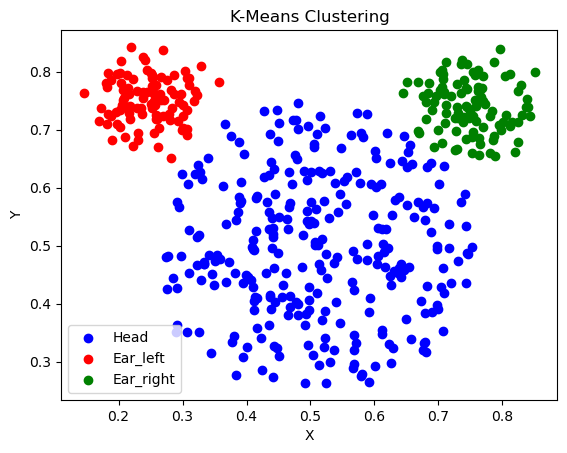

Confusion Matrix:
[[ 28 208  54]
 [100   0   0]
 [  0   0 100]]


In [82]:
# Create a confusion matrix
confusion_mtx = confusion_matrix(df['class'], predicted_labels, labels=['Head', 'Ear_left', 'Ear_right'])

# Define colors for each class
colors = {'Head': 'blue', 'Ear_left': 'red', 'Ear_right': 'green'}

# Create a list of colors for each data point based on their true class
point_colors = [colors[label] for label in df['class']]

# Create separate arrays for each class
class_data = {}
# separating Head, Ear_left, Ear_right into 3 different dataframes by creating
# entries into class_data with the valyes of the x-y pairs
for class_label in ['Head', 'Ear_left', 'Ear_right']:
    class_indices = df[df['class'] == class_label].index
    class_data[class_label] = df.loc[class_indices]

# Set labels and title for the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')

# Plot the data points with different colors for different classes
for class_label, data_points in class_data.items():
    plt.scatter(data_points['x'], data_points['y'], c=colors[class_label], marker='o', label=class_label)

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_mtx)

### 2b

#### E-Step Functions

In [83]:
# Get xn as a list
xn = coordinates.to_numpy()

# convert num_labels to one-hot encoding
# Original matrix
original_matrix = np.array(num_labels)

# Determine the number of unique values in the original matrix
num_classes = len(np.unique(original_matrix))

# Create a one-hot encoded matrix
one_hot_matrix = np.zeros((len(original_matrix), num_classes))
one_hot_matrix[np.arange(len(original_matrix)), original_matrix] = 1


# Set up gamma_k
gamma_head = one_hot_matrix[:, 0]
gamma_left = one_hot_matrix[:, 1]
gamma_right = one_hot_matrix[:, 2]

gamma_all = [gamma_head, gamma_left, gamma_right]

# Set up mu_k
mu_head, mu_left, mu_right = centroids[0], centroids[1], centroids[2]

mu_all = [mu_head, mu_left, mu_right]



In [84]:
# Calculate Gaussian PDF

# pair is a 1x2 matrix
# mu_k is a 1x2 matrix
# sigma_k 2x2 matrix bc 3 variables
def gauss_pdf(pair, mu_k, sigma_k):
    a = -0.5 * np.transpose(pair - mu_k)
    b = np.linalg.inv(sigma_k)
    c = (pair - mu_k)
    d = np.matmul(a, b)
    e = np.matmul(d, c)
    numerator = math.exp(e)
    
    denominator = math.sqrt(((2*math.pi)**2)*np.linalg.det(sigma_k))
    
    return np.divide(numerator, denominator)

In [85]:
# Gaussian pdf for all xn
# def gauss_pdf_all(mu_k, sigma_k):
#     for pair in xn:
#         gauss_pdf(pair, mu_k, sigma_k)

#### M-Step Functions

In [86]:
type(xn)
np.ndim(xn)

2

In [87]:
# Calculate the new mean mu_k

def calc_mu_k(gamma_k):
    numerator_sum = np.zeros((1,2))
    denominator_sum = 0
    for i in range(len(xn)):
        numerator_sum += gamma_k[i] * xn[i]
        denominator_sum += gamma_k[i]
        
    return numerator_sum

In [88]:
# Calculate Covariance sigma_k
def calc_sigma_k(mu_k, gamma_k):
    numerator_sum = np.zeros((2,2))
    denominator_sum = 0
    
    for i in range(len(xn)):
        a = (np.matmul( (xn[i] - mu_k).reshape((2,1)) , (xn[i] - mu_k).reshape((1,2)) ))
        numerator_sum += (gamma_k[i] * a)
        
        denominator_sum += gamma_k[i]

    
    # Check if denominator is close to zero (near-singular)
    # if np.linalg.norm(denominator_sum) < 1e-6:
    #     # Handle near-singular case (e.g., return a default covariance matrix)
    #     sigma_k = np.identity(2)  # You can use an appropriate default covariance matrix
    # else:
    #     sigma_k = np.divide(numerator_sum, denominator_sum)
        
    # return sigma_k
    
    return np.divide(numerator_sum, denominator_sum)

In [89]:
# Generate all Sigma
sigma_head = calc_sigma_k(mu_head, gamma_head)
sigma_left = calc_sigma_k(mu_left, gamma_left)
sigma_right = calc_sigma_k(mu_right, gamma_right)

In [90]:
# Calculate Mixing weights
def calc_w_k(gamma_k):
    sum = 0.0
    
    for i in range(len(xn)):
        sum += gamma_k[i]
    
    return sum / len(gamma_k)

In [91]:
# Generate all Mixing weights
w_head = calc_w_k(gamma_head)
w_left = calc_w_k(gamma_left)
w_right = calc_w_k(gamma_right)

### Initial Iteration - First E-Step

In [92]:
# Update gamma_k
# Updates entire column for 1 class
def update_gamma_k(gamma_k, mu_k, sigma_k, w_k):
    for i in range(len(xn)):
        numerator = w_k * gauss_pdf(xn[i], mu_k, sigma_k)
        
        denominator = (w_head + w_left + w_right) * gauss_pdf(xn[i], mu_head + mu_left + mu_right, sigma_head + sigma_left + sigma_right)
        
        gamma_k[i] = np.divide(numerator, denominator)
        
        

#### Now starting the process now that all functions have been defined:

##### E-Step

In [93]:
def e_step():    
    update_gamma_k(gamma_head, mu_head, sigma_head, w_head)
    update_gamma_k(gamma_left, mu_left, sigma_left, w_left)
    update_gamma_k(gamma_right, mu_right, sigma_right, w_right)



#### M-Step

In [94]:
def m_step(): 
    # Update means
    mu_head = calc_mu_k(gamma_head)
    mu_left = calc_mu_k(gamma_left)
    mu_right = calc_mu_k(gamma_right)

    # Update Covariances
    sigma_head = calc_sigma_k(mu_head, gamma_head)
    sigma_left = calc_sigma_k(mu_left, gamma_left)
    sigma_right = calc_sigma_k(mu_right, gamma_right)

    # Update Mixing Weights
    w_head = calc_w_k(gamma_head)
    w_left = calc_w_k(gamma_left)
    w_right = calc_w_k(gamma_right)

In [95]:
# Predicting
def predict():
    predictions = []
    for i in range(len(xn)):
        if gamma_head[i] > gamma_left[i] and gamma_head[i] > gamma_right[i]:
            predictions.append(0)
            
        if gamma_left[i] > gamma_head[i] and gamma_left[i] > gamma_right[i]:
            predictions.append(1)
            
        if gamma_right[i] > gamma_head[i] and gamma_right[i] > gamma_left[i]:
            predictions.append(2)
    
    return predictions

In [96]:
# Plotting

def plot(predictions_nums):
    # Map K-Means cluster labels to your classes (Head, Ear Right, Ear Left)
    cluster_to_class_mapping = {
        0: 'Head',
        1: 'Ear_left',
        2: 'Ear_right'
    }

    # Assign prediction-based labels based on GMM
    prediction_based_labels = [cluster_to_class_mapping[prediction] for prediction in predictions_nums]

    df = pd.DataFrame(data=xn, columns=['x', 'y'])
    df['class'] = prediction_based_labels
    # Define colors for each class
    colors = {'Head': 'blue', 'Ear_left': 'red', 'Ear_right': 'green'}

    # Create a list of colors for each data point based on their true class
    point_colors = [colors[label] for label in df['class']]

    # Create separate arrays for each class
    class_data = {}
    # separating Head, Ear_left, Ear_right into 3 different dataframes by creating
    # entries into class_data with the valyes of the x-y pairs
    for class_label in ['Head', 'Ear_left', 'Ear_right']:
        class_indices = df[df['class'] == class_label].index
        class_data[class_label] = df.loc[class_indices]

    # Set labels and title for the plot
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('EM')

    # Plot the data points with different colors for different classes
    for class_label, data_points in class_data.items():
        plt.scatter(data_points['x'], data_points['y'], c=colors[class_label], marker='o', label=class_label)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

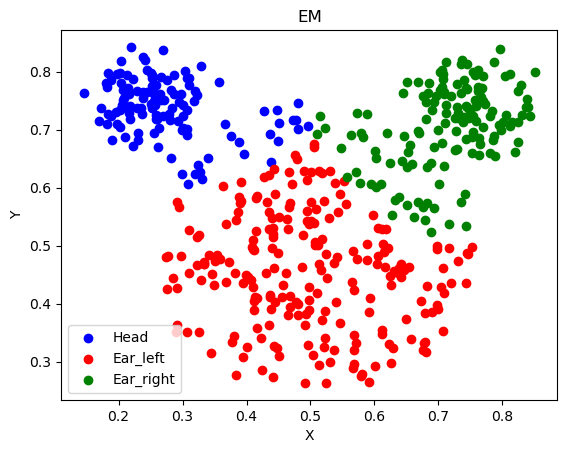

In [97]:
# 1st iteration

e_step()
m_step()
predictions_1st = predict()
plot(predictions_1st)

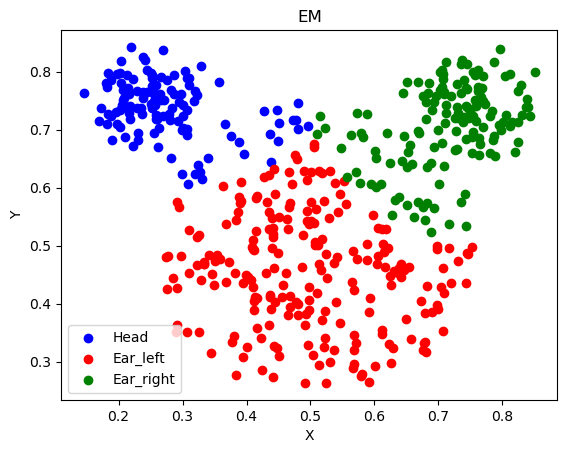

In [98]:
# 2nd iteration

e_step()
m_step()
predictions_2nd = predict()
plot(predictions_2nd)

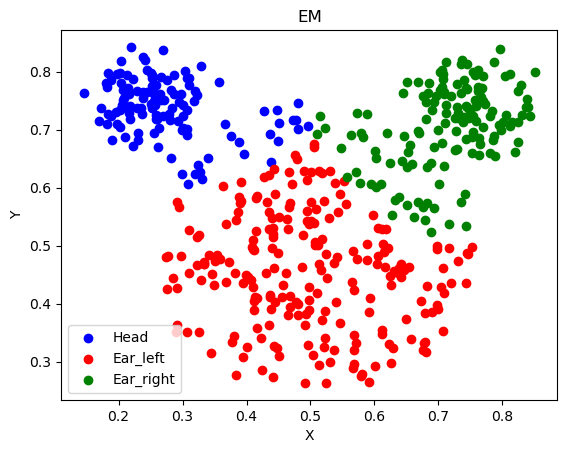

In [99]:
# 3rd iteration

e_step()
m_step()
predictions_3rd = predict()
plot(predictions_3rd)

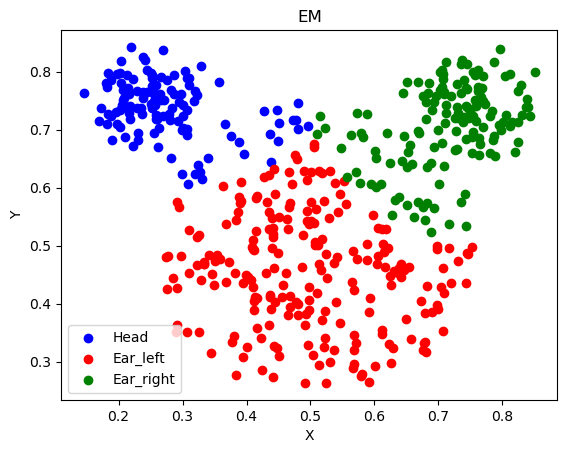

In [100]:
# 4th iteration

e_step()
m_step()
predictions_4th = predict()
plot(predictions_4th)

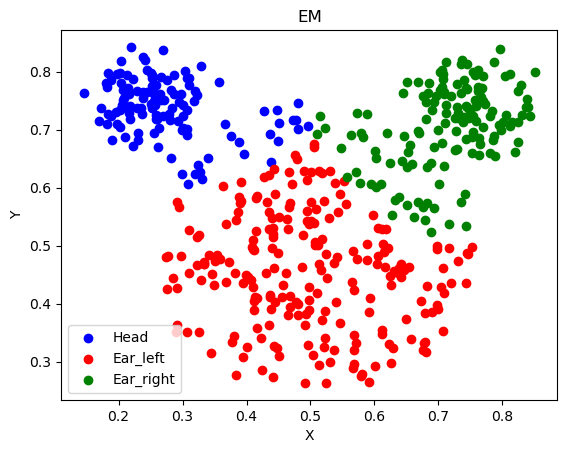

In [101]:
# Lots of iterations. Let's see what happens
predictions_nth = []
for i in range(200):
    e_step()
    m_step()
    predictions_nth = predict()  

plot(predictions_nth)  



I assume that the GMM method for clustering is superior to the kmeans clustering. I think I have a made few errors in my code however as the graphs are not being updated for some reason